# Think Bayes

This notebook presents code and exercises from Think Bayes, second edition.

Copyright 2018 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

import numpy as np
import pandas as pd

from thinkbayes2 import Pmf, Cdf, Suite, Joint
import thinkplot

ERROR:root:The 'ast_node_interactivity' trait of a ZMQInteractiveShell instance must be any of ['all', 'last', 'last_expr', 'none'], but a value of 'last_expr_or_assign' <class 'str'> was specified.


### The height problem

For adult male residents of the US, the mean and standard deviation of height are 178 cm and 7.7 cm.  For adult female residents the corresponding stats are 163 cm and 7.3 cm.  Suppose you learn that someone is 170 cm tall.  What is the probability that they are male? 

Run this analysis again for a range of observed heights from 150 cm to 200 cm, and plot a curve that shows P(male) versus height.  What is the mathematical form of this function?

To represent the likelihood functions, I'll use `norm` from `scipy.stats`, which returns a "frozen" random variable (RV) that represents a normal distribution with given parameters.


In [2]:
from scipy.stats import norm

dist_height = dict(male=norm(178, 7.7),
                   female=norm(163, 7.3))

Write a class that implements `Likelihood` using the frozen distributions.  Here's starter code:

In [3]:
class Height(Suite):
    
    def Likelihood(self, data, hypo):
        """
        data: height in cm
        hypo: 'male' or 'female'
        """
        return 1

In [4]:
# Solution goes here

Here's the prior.

In [5]:
suite = Height(['male', 'female'])
for hypo, prob in suite.Items():
    print(hypo, prob)

male 0.5
female 0.5


And the update:

In [6]:
suite.Update(170)
for hypo, prob in suite.Items():
    print(hypo, prob)

male 0.5
female 0.5


Compute the probability of being male as a function of height, for a range of values between 150 and 200.

In [7]:
# Solution goes here

In [8]:
# Solution goes here

If you are curious, you can derive the mathematical form of this curve from the PDF of the normal distribution.

### How tall is A?

Suppose I choose two residents of the U.S. at random.  A is taller than B.  How tall is A?

What if I tell you that A is taller than B by more than 5 cm.  How tall is A?

For adult male residents of the US, the mean and standard deviation of height are 178 cm and 7.7 cm.  For adult female residents the corresponding stats are 163 cm and 7.3 cm.

Here are distributions that represent the heights of men and women in the U.S.

In [9]:
dist_height = dict(male=norm(178, 7.7),
                   female=norm(163, 7.3))

In [10]:
hs = np.linspace(130, 210)
ps = dist_height['male'].pdf(hs)
male_height_pmf = Pmf(dict(zip(hs, ps)));

In [11]:
ps = dist_height['female'].pdf(hs)
female_height_pmf = Pmf(dict(zip(hs, ps)));

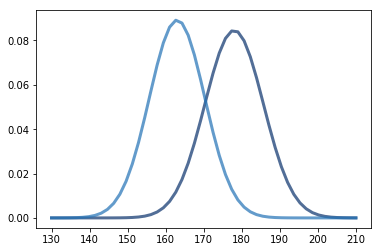

In [20]:
thinkplot.Pdf(male_height_pmf, label='Male')
thinkplot.Pdf(female_height_pmf, label='Female')

Use `thinkbayes2.MakeMixture` to make a `Pmf` that represents the height of all residents of the U.S.

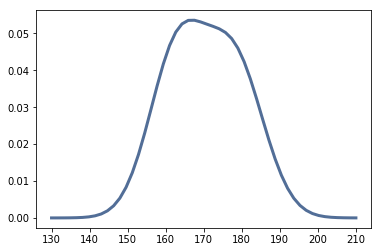

In [24]:
import thinkbayes2

metapmf = Pmf([male_height_pmf,female_height_pmf])
mix = thinkbayes2.MakeMixture(metapmf)
thinkplot.Pdf(mix)

Write a class that inherits from Suite and Joint, and provides a Likelihood function that computes the probability of the data under a given hypothesis.

In [27]:
class Heights(Suite, Joint):
    def likelihood(self,data,hypo):
        h1,h2 = hypo
        if data== 'A':
            return 1 if h1 > h2 else 0
        if data=='B':
            return 1 if h1<h2 else 0

Write a function that initializes your `Suite` with an appropriate prior.

In [31]:
def make_prior(pmf):
    prior = Heights()
    for x1, p1 in pmf.Items():
        for x2, p2 in pmf.Items():
            prior[x1, x2] = p1 * p2
    return prior

In [32]:
suite = make_prior(mix)
suite.Total()

1.0000000000000024

/home/cgirard/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


AttributeError: module 'thinkplot' has no attribute 'decorate'

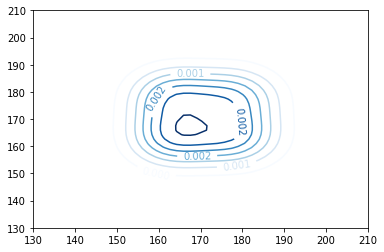

In [34]:
thinkplot.Contour(suite)
thinkplot.decorate(xlabel='B Height (cm)',
                   ylabel='A Height (cm)',
                   title='Posterior joint distribution')

Update your `Suite`, then plot the joint distribution and the marginal distribution, and compute the posterior means for `A` and `B`.

In [19]:
# Solution goes here

In [20]:
# Solution goes here

In [22]:
# Solution goes here